In [107]:
import networkx as nx

In [108]:
import matplotlib.pyplot as plt

In [109]:
%matplotlib inline

## Settings up things

In [110]:
import os
import requests
import json
import csv
import pandas as pd

## Getting the data

In [111]:
url = 'https://data.bnf.fr/sparql'
query = """
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX rdarelationships: <http://rdvocab.info/RDARelationshipsWEMI/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT DISTINCT ?edition ?titre ?date ?editeur ?contributor ?contributorName
WHERE {
  <http://data.bnf.fr/ark:/12148/cb11947965f> foaf:focus ?Oeuvre .
  ?edition rdarelationships:workManifested ?Oeuvre. 
  OPTIONAL{
    ?edition dcterms:date ?date
  }OPTIONAL{
    ?edition dcterms:title ?titre
  }OPTIONAL{
    ?edition dcterms:publisher ?editeur
  }OPTIONAL{
    ?edition rdarelationships:expressionManifested ?exp.
    ?exp dcterms:contributor ?contributor.
    ?contributor foaf:name ?contributorName  
  }
}
"""
#r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query})
r = requests.get(url, params = {'format': 'text/csv', 'query': query})
print(r.text)
print('results retrieved!')

"edition","titre","date","editeur","contributor","contributorName"
"http://data.bnf.fr/ark:/12148/cb317586517#about","Les Fleurs du mal... 6e mille","1919","Paris , 1919. In-12","http://data.bnf.fr/ark:/12148/cb118905823#about","Charles Baudelaire"
"http://data.bnf.fr/ark:/12148/cb31758652k#about","Charles Baudelaire. Les Fleurs du Mal. Texte de 1861 avec les variantes de 1857 et des journaux et revues. Précédé d'une étude sur Baudelaire, par Théodore de Banville. Deux portraits et une autographe. 8e mille","1923","Tours, impr. Deslis père, R. et P. Deslis ; Paris, Bibliothèque Charpentier, Eugène Fasquelle, éditeur, II, rue de Grenelle , 1923. In-16, XXVIII-383 p. [8396]","http://data.bnf.fr/ark:/12148/cb118905823#about","Charles Baudelaire"
"http://data.bnf.fr/ark:/12148/cb317739638#about","Les Fleurs du mal : Spleen et idéal","1948","Paris : M. Sautier , 1948","http://data.bnf.fr/ark:/12148/cb118905823#about","Charles Baudelaire"
"http://data.bnf.fr/ark:/12148/cb317739638#about","Le

## Save CSV file

In [112]:
# save the result
f = open("bnf-records.csv", "w")
f.write(r.text)
f.close()

## Read the results

In [113]:
# Load the CSV file from GitHub.
# This puts the data in a Pandas DataFrame
df = pd.read_csv('bnf-records.csv')

In [114]:
df

,edition,titre,date,editeur,contributor,contributorName
0,http://data.bnf.fr/ark:/12148/cb317586517#about,Les Fleurs du mal... 6e mille,1919,"Paris , 1919. In-12",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
1,http://data.bnf.fr/ark:/12148/cb31758652k#about,Charles Baudelaire. Les Fleurs du Mal. Texte d...,1923,"Tours, impr. Deslis père, R. et P. Deslis ; Pa...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
2,http://data.bnf.fr/ark:/12148/cb317739638#about,Les Fleurs du mal : Spleen et idéal,1948,"Paris : M. Sautier , 1948",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
3,http://data.bnf.fr/ark:/12148/cb317739638#about,Les Fleurs du mal : Spleen et idéal,1948,"Paris : M. Sautier , 1948",http://data.bnf.fr/ark:/12148/cb120604045#about,Édouard Goerg
4,http://data.bnf.fr/ark:/12148/cb317739638#about,Les Fleurs du mal : Spleen et idéal,1948,"Paris : M. Sautier , 1948",http://data.bnf.fr/ark:/12148/cb11987356n#about,Henri Creuzevault
5,http://data.bnf.fr/ark:/12148/cb317739638#about,Les Fleurs du mal : Spleen et idéal,1948,"Paris : M. Sautier , 1948",http://data.bnf.fr/ark:/12148/cb12505478j#about,Colette Creuzevault
6,http://data.bnf.fr/ark:/12148/cb317739638#about,Les Fleurs du mal : Spleen et idéal,1948,"Paris : M. Sautier , 1948",http://data.bnf.fr/ark:/12148/cb15017639f#about,Marguerite Creuzevault
7,http://data.bnf.fr/ark:/12148/cb317739638#about,Les Fleurs du mal : Spleen et idéal,1948,"Paris : M. Sautier , 1948",http://data.bnf.fr/ark:/12148/cb150176410#about,Michèle Creuzevault
8,http://data.bnf.fr/ark:/12148/cb31773962x#about,Charles Baudelaire. One hundred poems from Les...,1947,"Berkeley, University of California press , 194...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
9,http://data.bnf.fr/ark:/12148/cb31773946p#about,Charles Baudelaire. Les Fleurs du mal,1945,"Paris, F. Hazan ; (Dijon, impr. de Darantière)...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire


In [128]:
# Build your graph
G = nx.from_pandas_edgelist(df(df.date == '1923'), 'edition', 'contributor')

#plt.figure(figsize=(15,15))

# Plot it
#nx.draw(G, with_labels=True)

nx.draw(G, scale=3)  
plt.show()

TypeError: 'DataFrame' object is not callable

## Exploring the data

We can filter the data by year

In [129]:
df[(df.date == '1923')]

,edition,titre,date,editeur,contributor,contributorName
1,http://data.bnf.fr/ark:/12148/cb31758652k#about,Charles Baudelaire. Les Fleurs du Mal. Texte d...,1923,"Tours, impr. Deslis père, R. et P. Deslis ; Pa...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
15,http://data.bnf.fr/ark:/12148/cb31773881x#about,Les fleurs du mal,1923,"Paris : Cercle Grolier , 1923",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
16,http://data.bnf.fr/ark:/12148/cb31773881x#about,Les fleurs du mal,1923,"Paris : Cercle Grolier , 1923",http://data.bnf.fr/ark:/12148/cb11915191p#about,Camille Mauclair
17,http://data.bnf.fr/ark:/12148/cb31773881x#about,Les fleurs du mal,1923,"Paris : Cercle Grolier , 1923",http://data.bnf.fr/ark:/12148/cb133359639#about,Alméry Lobel-Riche
51,http://data.bnf.fr/ark:/12148/cb317738739#about,"Les Fleurs du Mal : édition intégrale, revue s...",1923,"Paris : Garnier frères, libr.-éditeurs , 1921 ...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
52,http://data.bnf.fr/ark:/12148/cb317738739#about,"Les Fleurs du Mal : édition intégrale, revue s...",1923,"Paris : Garnier frères, libr.-éditeurs , 1921 ...",http://data.bnf.fr/ark:/12148/cb12301892w#about,Ernest Raynaud
63,http://data.bnf.fr/ark:/12148/cb31773883m#about,Ch. Baudelaire. Les Fleurs du mal,1923,"Paris : impr. et libr. Alphonse Lemerre , 1923",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
75,http://data.bnf.fr/ark:/12148/cb31773880k#about,Charles Baudelaire. Les Fleurs du Mal. Texte d...,1923,"Tours, impr. Deslis père, R. et P. Deslis ; Pa...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
119,http://data.bnf.fr/ark:/12148/cb317738781#about,Charles Baudelaire. Les Fleurs du mal,1923,"Paris, G. Boutitie (impr. de G. Boutitie) , 19...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire
181,http://data.bnf.fr/ark:/12148/cb31773879c#about,Les Fleurs du mal,1923,"Paris, Emile-Paul frères (impr. de Frazier-Soy...",http://data.bnf.fr/ark:/12148/cb118905823#about,Charles Baudelaire


## Create graph

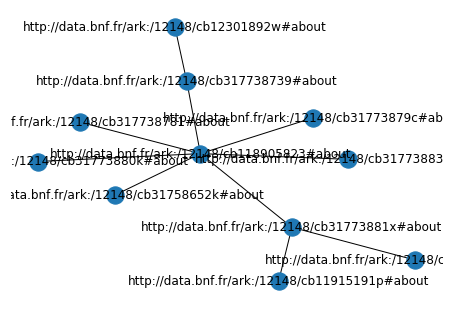

In [130]:
# Build your graph
G = nx.from_pandas_edgelist(df[(df.date == '1923')], 'edition', 'contributor')

# Plot it
#nx.draw(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.show()

### We also plot using the labels

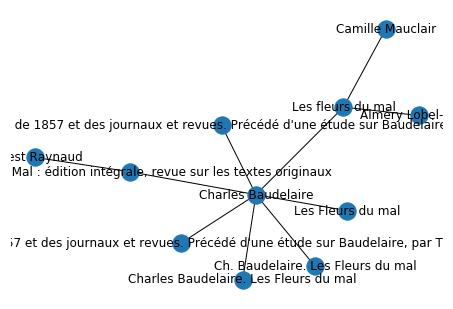

In [131]:
# Build your graph
G = nx.from_pandas_edgelist(df[(df.date == '1923')], 'titre', 'contributorName')

# Plot it
nx.draw(G, with_labels=True)
plt.show()